In [23]:
"""
Alunos:
    David Cardoso Yonekura
    Lucas da Silva Lima
    Rafael Barbosa de Carvalho

"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from neuron import Neuron

Configurações:  [0.4, -100, 100]
Vetor de pesos inicial:  [-47.75392668 -59.03969794  91.93762929]
Alterações no vetor de Pesos:  594
Numero de Epocas:  11
Vetor de Pesos no final:  [19.8825 -6.1719 -5.6624]




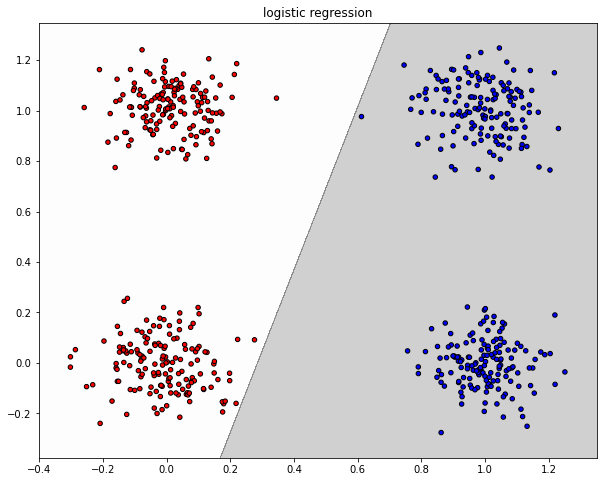

Configurações:  [0.4, -1, 1]
Vetor de pesos inicial:  [-0.95928778 -0.36617348 -0.91790306]
Alterações no vetor de Pesos:  9
Numero de Epocas:  4
Vetor de Pesos no final:  [ 0.886   0.1288 -0.5179]




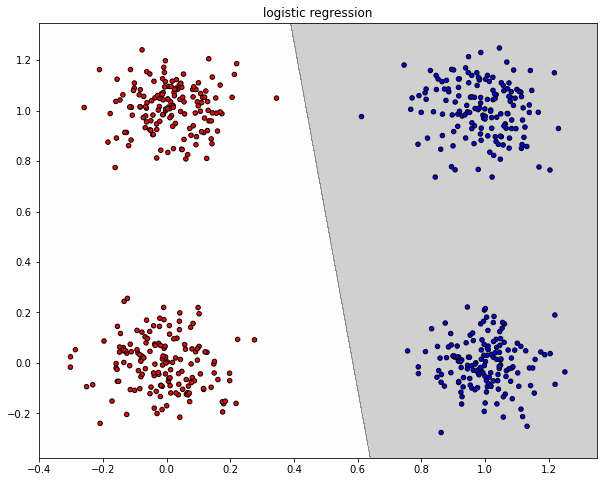

Configurações:  [0.4, -0.5, 0.5]
Vetor de pesos inicial:  [0.37151711 0.194788   0.30493365]
Alterações no vetor de Pesos:  6
Numero de Epocas:  4
Vetor de Pesos no final:  [ 0.855   0.182  -0.4951]




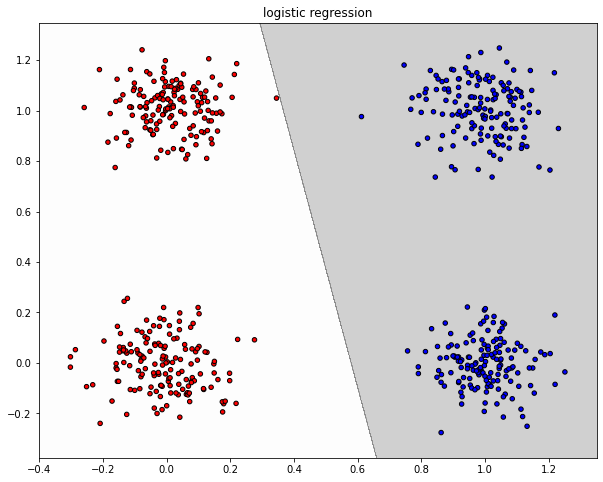

Configurações:  [0.1, -100, 100]
Vetor de pesos inicial:  [ 25.15333929 -48.88707988 -20.96089152]
Alterações no vetor de Pesos:  527
Numero de Epocas:  64
Vetor de Pesos no final:  [ 47.5539 -16.2903 -13.0609]




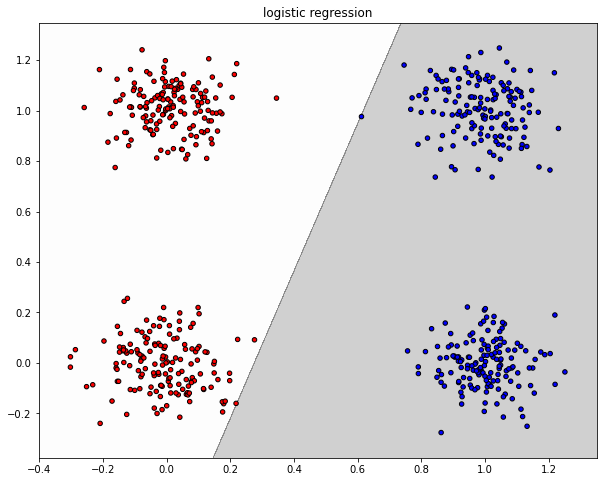

Configurações:  [0.1, -1, 1]
Vetor de pesos inicial:  [-0.8399241   0.5344254  -0.91841179]
Alterações no vetor de Pesos:  34
Numero de Epocas:  12
Vetor de Pesos no final:  [ 0.6384 -0.0675 -0.3184]




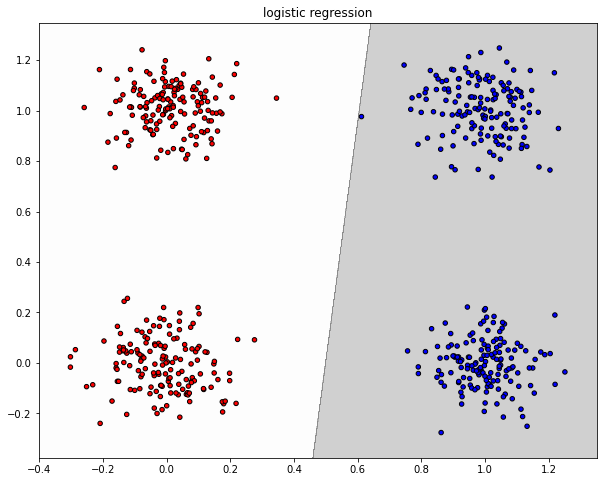

Configurações:  [0.1, -0.5, 0.5]
Vetor de pesos inicial:  [ 0.24326487 -0.43801848 -0.37124412]
Alterações no vetor de Pesos:  8
Numero de Epocas:  4
Vetor de Pesos no final:  [ 0.6291 -0.1027 -0.1712]




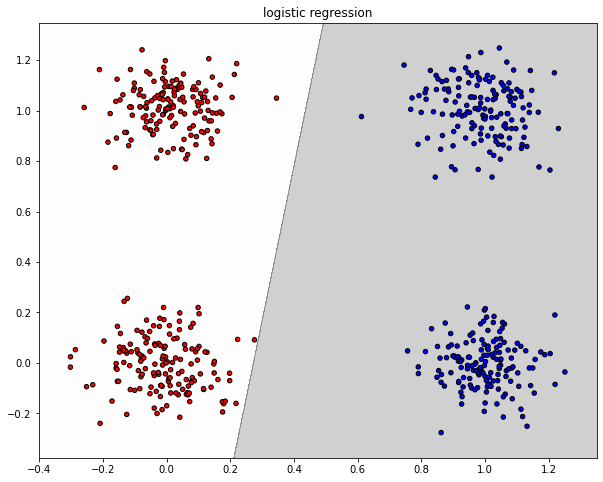

Configurações:  [0.01, -100, 100]
Vetor de pesos inicial:  [-90.76329515 -13.15624538  28.75795607]
Alterações no vetor de Pesos:  22253
Numero de Epocas:  100
Vetor de Pesos no final:  [ 4.5728 -1.6151 -1.212 ]




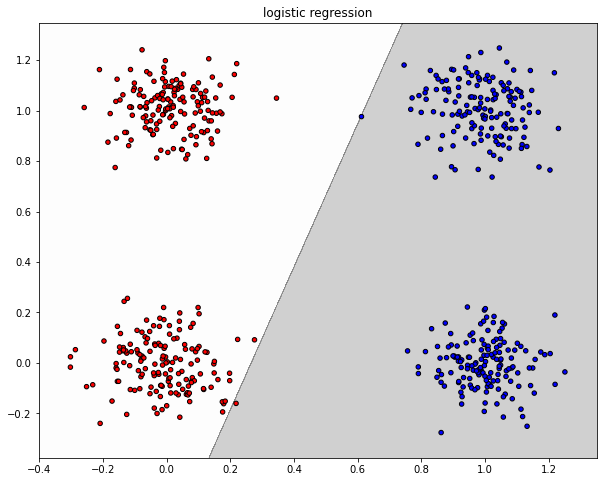

Configurações:  [0.01, -1, 1]
Vetor de pesos inicial:  [-0.13985963 -0.95021088 -0.4434745 ]
Alterações no vetor de Pesos:  175
Numero de Epocas:  12
Vetor de Pesos no final:  [ 0.7104 -0.2346 -0.1935]




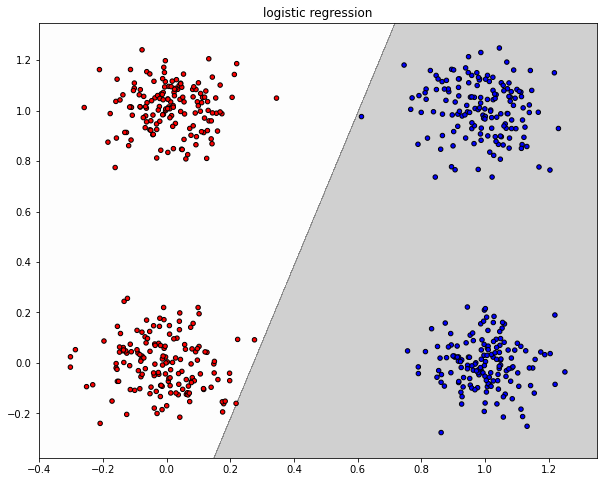

Configurações:  [0.01, -0.5, 0.5]
Vetor de pesos inicial:  [ 0.35490857 -0.2448146  -0.2024019 ]
Alterações no vetor de Pesos:  12
Numero de Epocas:  4
Vetor de Pesos no final:  [ 0.4325 -0.1395 -0.1224]




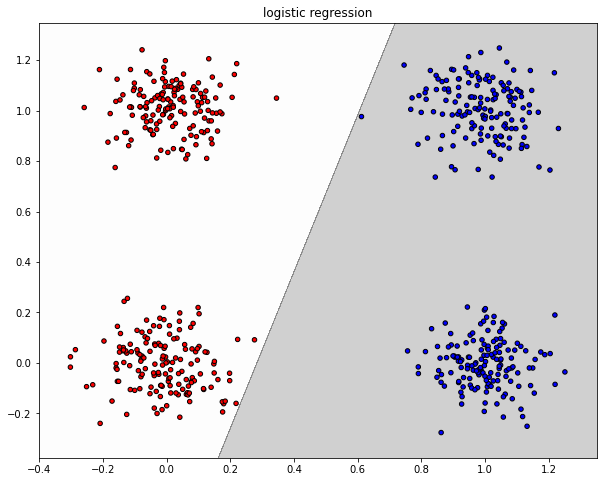

   Qtd_Ajustes_Pesos  Qtd_Epocas  Media_Ajuste_Pesos  Media_Epocas  \
0                594          11                5.94          0.11   
1                  9           4                0.09          0.04   
2                  6           4                0.06          0.04   
3                527          64                5.27          0.64   
4                 34          12                0.34          0.12   
5                  8           4                0.08          0.04   
6              22253         100              222.53          1.00   
7                175          12                1.75          0.12   
8                 12           4                0.12          0.04   

   Desvio_Ajuste_Pesos  Desvio_Epocas  
0               58.806          1.089  
1                0.891          0.396  
2                0.594          0.396  
3               52.173          6.336  
4                3.366          1.188  
5                0.792          0.396  
6             2203.

In [24]:
def plotConfigs(X, y, x, line, n):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                         np.arange(y_min, y_max, 0.001))

    f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))
    color = np.where(y == 0, 'r', 'b')

    for idx, clf, tt in zip([[0,0]],
                            [n],
                            ['logistic regression']):

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = np.array(Z)
        Z = Z.reshape(xx.shape)

        axarr.contourf(xx, yy, Z, alpha=0.2,cmap='Greys')
        axarr.scatter(X[:, 0], X[:, 1], c=color, s=20, edgecolor='k',cmap='Greys')
        axarr.set_title(tt)

    plt.show()


with open('data/data3.txt', 'rb') as file:
    auxFile = file.read()

data3 = np.frombuffer(auxFile)
data3.resize((int(len(data3)/3)), 3)
X = data3[...,0:2] #[[x01,x02], ...]
y = data3[...,2] #[[yd0], [yd1], ...]

# #adicionando x_0 no x(n)
X = np.insert(X, 2, 1, axis=1)

configs = [[0.4,-100,100], [0.4,-1,1], [0.4,-0.5,0.5],
          [0.1,-100,100], [0.1,-1,1], [0.1,-0.5,0.5],
          [0.01,-100,100], [0.01,-1,1], [0.01,-0.5,0.5]]

fitWeight= []
epoch = []
for k in range(9):
    print("Configurações: ", configs[k])
    n = Neuron(configs[k][0], configs[k][1], configs[k][2])
    print("Vetor de pesos inicial: ",n.weightArray)
    n.iteratedFit(X, y, 100)
    fitWeight.append(n.fitCountWeight)
    epoch.append(n.epoch)
    print("Alterações no vetor de Pesos: ", n.fitCountWeight)
    print("Numero de Epocas: ", n.epoch)
    print("Vetor de Pesos no final: ", np.around(n.weightArray,4))
    print("\n")
    
    x = []
    line = []
    x = ([i for i in range(-len(data3),len(data3))])
    line = ([(n.weightArray[0]/n.weightArray[1]) * i * -1  - n.weightArray[2]/n.weightArray[0] for i in x])# calcula a reta y = mx + b
        
    plotConfigs(X,y,x, line, n)

fw = np.array(fitWeight)
ep = np.array(epoch)

fw = fw/100
ep = ep/100

dp_fw = []
dp_ep = []

for i in range(9):
    dp_fw.append((((fitWeight[i]-fw[i])**2)/100)**0.5)
    dp_ep.append((((epoch[i]-ep[i])**2)/100)**0.5)

df = pd.DataFrame({"Qtd_Ajustes_Pesos": fitWeight, "Qtd_Epocas": epoch,"Media_Ajuste_Pesos": fw, "Media_Epocas": ep, "Desvio_Ajuste_Pesos": dp_fw, "Desvio_Epocas": dp_ep})
print(df)

